In [11]:
!pip install plotly
!pip install dash
!pip install wordcloud
!pip install cufflinks
!pip install missingno

In [12]:
from plotly.offline import init_notebook_mode, iplot, plotly

ImportError: cannot import name 'plotly' from 'plotly.offline' (C:\Users\user\anaconda3\lib\site-packages\plotly\offline\__init__.py)

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [17]:
import plotly as py
init_notebook_mode(connected = True) #inline olarak görüntülemek için başlatıyoruz same to = %matplotlib inline
import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı
#!pip install dash
from dash import Dash, dcc, html, Input, Output #dcc interaktiflik kazandırıyor,
# word cloud library
from wordcloud import WordCloud
# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
cf.go_offline() #grafikleri offline olarak yapıyoruz
# warnings
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode, iplot, plot

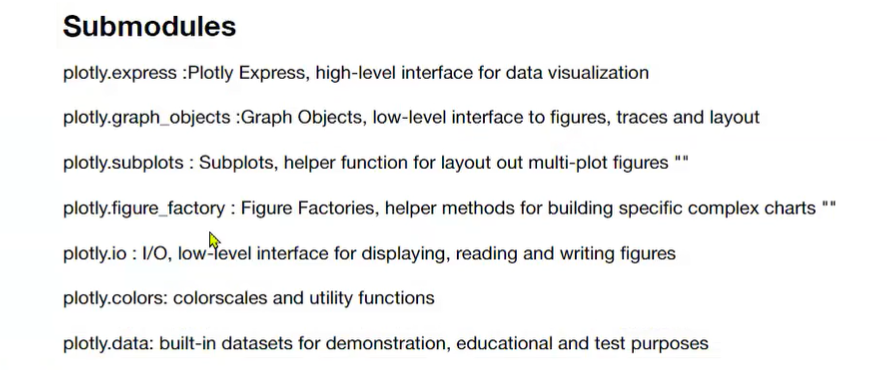

In [18]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [24]:
timesData.sample(5)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1640,226-250,Tokyo Metropolitan University,Japan,19.6,39.5,9.8,100.0,31.0,-,"9,303",9.9,4%,35 : 65,2015
454,251-275,Johannes Kepler University of Linz,Austria,18.4,56.6,11.1,62.8,73.4,-,"19,646",29.1,10%,48 : 52,2012
1876,74,University of Groningen,Netherlands,43.3,63.9,56.9,84.0,92.4,62.4,"24,556",25.6,12%,52 : 48,2016
2187,351-400,University of South Dakota,United States of America,29.3,17.1,12.1,70.4,28.0,-,"8,003",17.1,2%,61 : 39,2016
160,161,Arizona State University,United States of America,43.0,24.1,44.1,66.9,-,50.3,"83,236",29.9,9%,50 : 50,2011


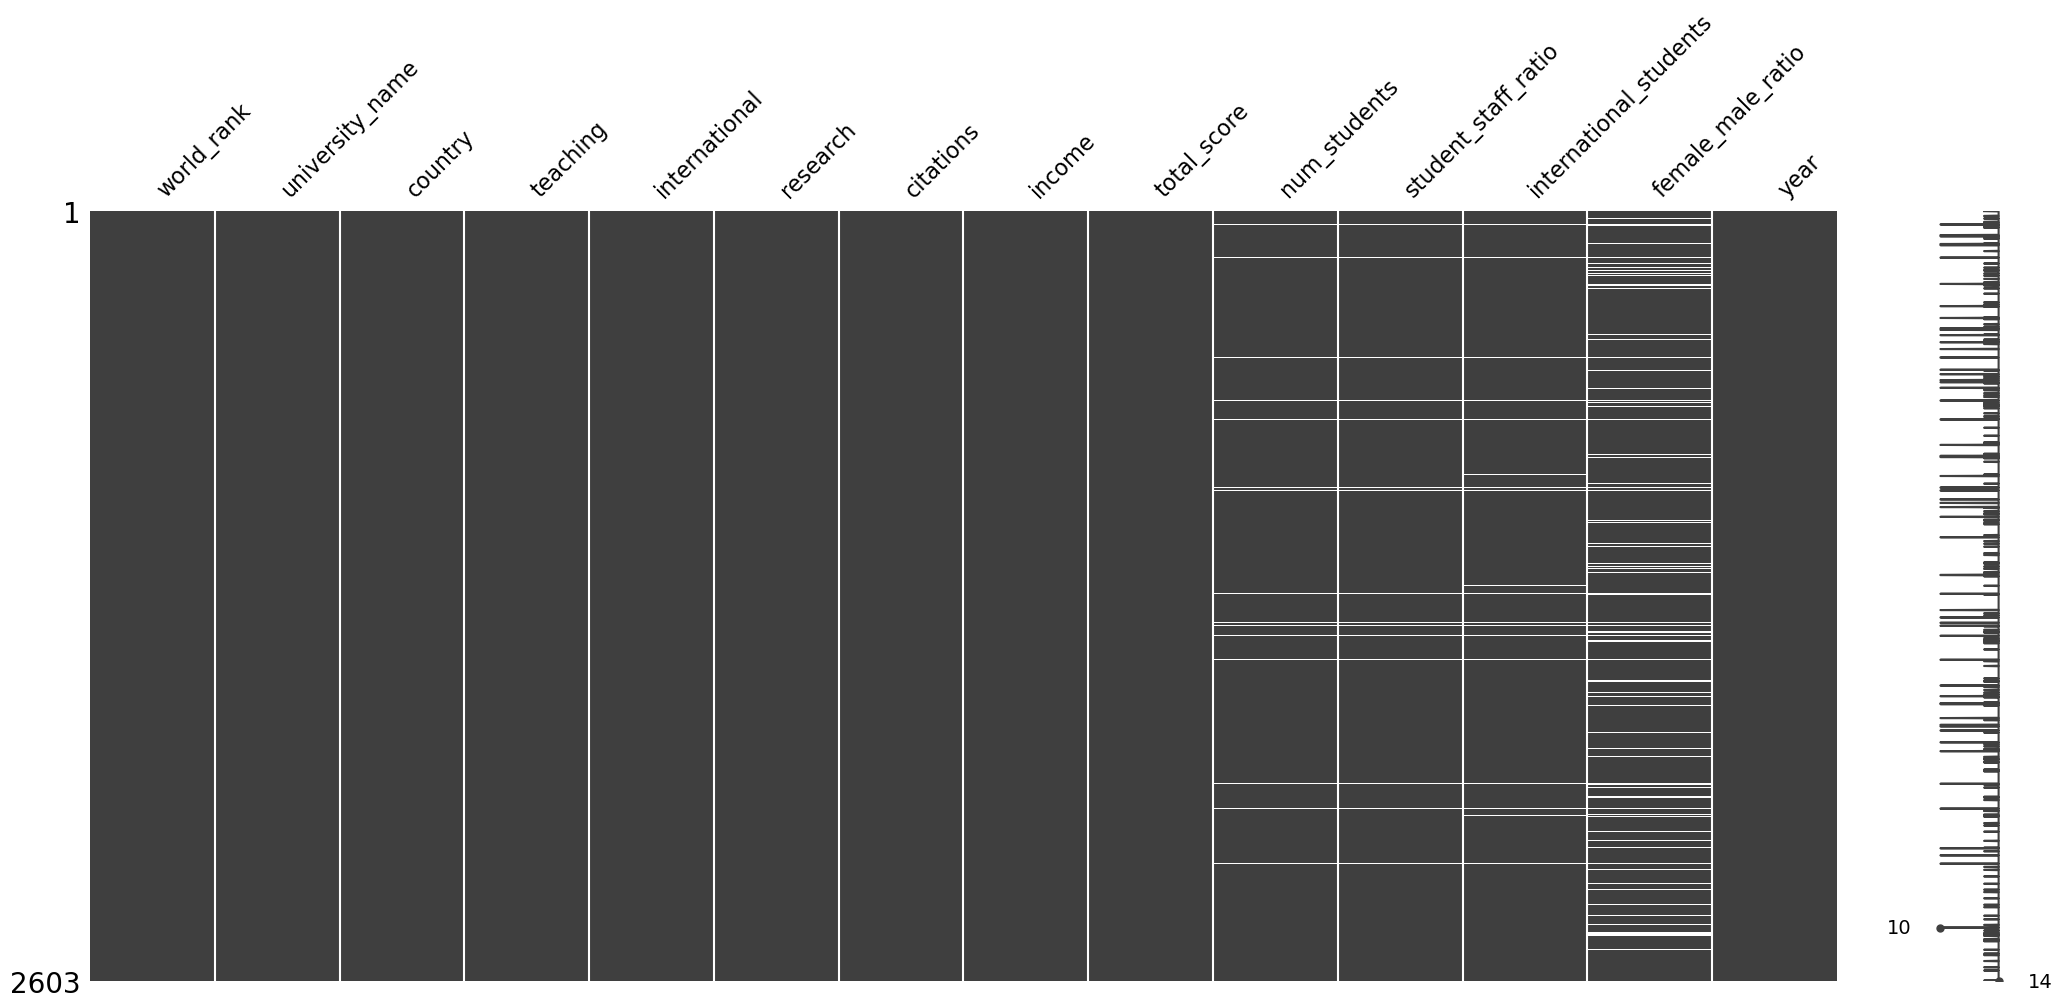

In [25]:
#White areas will represent the missing values.

import missingno 
missingno.matrix(timesData);

In [20]:
timesData.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [21]:
df = timesData.iloc[:100, :]
df.shape

(100, 14)

In [22]:
#plt.style.use("ggplot")
# creating trace 1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    #Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür.
                                        #Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür.
                                        #20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)
data = [trace1, trace2]
layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", #axes olarak düşünebiliriz
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))
fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip
iplot(fig)                                #iplot(fig) ile çizdiriyoruz.

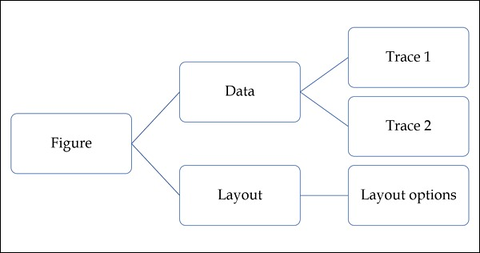

In [26]:
fig = px.line(y=[1, -1], x=[-1,1])

fig.update_xaxes(zeroline=False,linewidth=6, zerolinecolor='rgba(0,255,0,0.5)')
fig.update_yaxes(zeroline=True, zerolinewidth=6, zerolinecolor='rgba(0,0,255,0.5)')

fig.show()

In [27]:
df = px.data.iris()

In [28]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species")
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=20)
fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, col=1)
fig.show()

In [35]:
dataset = sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
plt.style.use('ggplot')

dataset2 = dataset[["total_bill", "tip", "size"]]

dataset2.iplot();

In [38]:
# prepare data drames
df2014 = timesData[timesData.year == 2014].iloc[:100, :]  # iloc ile indexleme yaparak istediğimiz yıllara ait verileri yeni df olarak oluşturuyoruz.
df2015 = timesData[timesData.year == 2015].iloc[:100, :]
df2016 = timesData[timesData.year == 2016].iloc[:100, :]

In [39]:
# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)
# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))
fig = dict(data = data, layout = layout)
iplot(fig)


In [40]:
gm = px.data.gapminder()
gm

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [31]:
Bar Charts
seaborn da olduğu gibi plotlyde de içine embed veri setleri var. Bunlardan çalışalım biraz ülkelerin popülasyonu ile ilgili bir veri seti çağıracağız.
data setleri hakkında kısa bilgi için "http://plotly.github.io/datasets/
Datamız yıllara sari olarak ülke bilgilerini içeriyor
LifeExp=Ortalama Ömür
pop = poülasyon
gdpPercap = kişi başı gelir yıllık yada kişi alım gücü
iso_num = ülkenin numarası

SyntaxError: invalid syntax (880368155.py, line 1)

In [41]:
df_europe = px.data.gapminder().query("continent =='Europe' and year == 2007 and pop > 5.e6" )
fig = px.bar(df_europe, y= "pop", x= "country", text = "pop", color ="country")
fig.update_traces(textposition = "outside", texttemplate = "%{text:.3s}", textfont_size=12) #int, s, f verdiğimizde type göre işlem yapıyor
fig.update_layout(xaxis_tickangle = -45,
                  font_family="Arial",
                  font_color="red",
                  font_size = 12)


In [43]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
df = df2016.num_students
df.count()

7

In [44]:
df1 = (df.str.replace(",", "")).astype("float")

In [45]:
df2 = list((df.str.replace(",", "")).astype("float"))
df2

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

In [46]:
pie_list =[float(each.replace(",", ""))for each in df2016.num_students]
pie_list

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

In [33]:
labels = df2016.university_name
# figure
fig = {
    "data" : [
        {
            "values" : pie_list,
            "labels" : labels,
            "domain" : {"x": [0, .5]},
            "name" : "Number Of Students Rates",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2, 0.2] #exploded
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",
        "annotations" : [
            {"font" : {"size" : 20},
             "text" : "Number of Students",
             "x" : 0.3,
             "y" : 1
            },
        ]
    }
}
iplot(fig)
6:59
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()
7:00
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]
num_students_size

SyntaxError: illegal target for annotation (1459072235.py, line 28)

In [34]:
df2016.international
international_color = [float(each) for each in df2016.international]
data = [
    {
        "y" : df2016.teaching,
        "x" : df2016.world_rank,
        "mode" : "markers",
        "marker" : {
            "color" : international_color,
            "size" : num_students_size,
            "showscale" : True
        },
        "text" : df2016.university_name
    }
]
iplot(data)

NameError: name 'df2016' is not defined